### **Data Ingestion, Preliminary Data Analysis**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import pandas as pd
import numpy as np
import os

In [2]:
zip_path = r"C:\Users\Perpetual's World\Downloads\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.printdir()

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [3]:
with zipfile.ZipFile(zip_path) as z:
  with z.open('winequality-white.csv') as f:
    white_wine = pd.read_csv(f, sep = ";")

In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
num_features = white_wine.select_dtypes(include=['float64', 'int64']).columns

white_wine[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [7]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [8]:
def quality_category(x):
  if x <= 4:
    return 'Low'
  elif x <= 6:
    return 'Medium'
  else:
    return 'High'
  
white_wine['quality_label'] = white_wine['quality'].apply(quality_category)

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [9]:
df = white_wine.copy()

### **Univariate analysis**

In [10]:
def univariate_numerical_eda(df, column):
  print(f" Feature: {column}")
  print("="*40)
  print(df[column].describe().to_frame())
  print(f"\nSkewness: {df[column].skew():.3f}")
  print(f"\nKurtosis: {df[column].kurt():.3f}")

  plt.figure(figsize=(12,4))

  # Histogram + KDE
  plt.subplot(1,2,1)
  sns.histplot(df[column], kde=True, bins=30, color='teal')
  plt.title(f'\n Distribution of {column}', fontsize=13)
  plt.xlabel(column)
  plt.ylabel('Frequency')

  # Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=df[column], color='teal')
  plt.title(f'\n Boxplot of {column}', fontsize=13)

  plt.tight_layout()
  plt.show()

  # Optional note on transformation
  if abs(df[column].skew()) > 1:
    print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
  elif abs(df[column].skew()) > 0.5:
    print(f"{column} is moderately skewed.")
  else:
    print(f"{column} is fairly symmetric.")


 Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.648

Kurtosis: 2.172


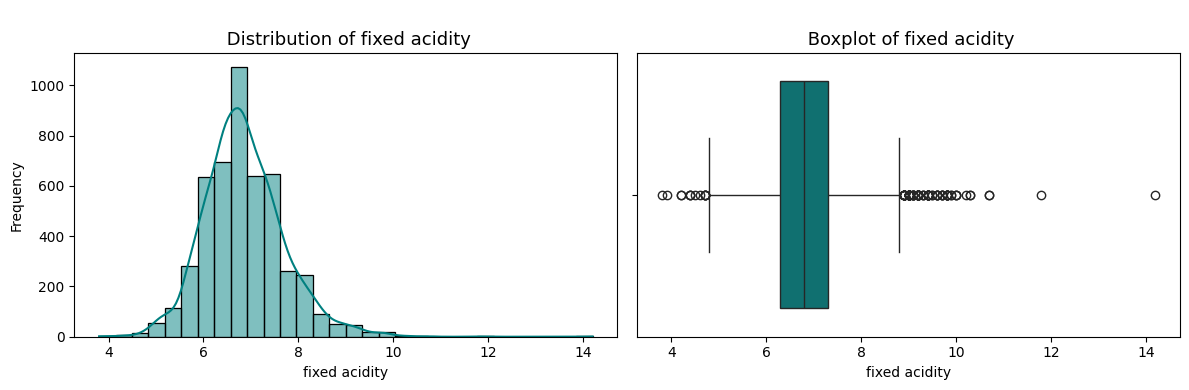

fixed acidity is moderately skewed.


In [11]:
# 1. Fixed Acidity
univariate_numerical_eda(df, 'fixed acidity')

 Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.648

Kurtosis: 2.172


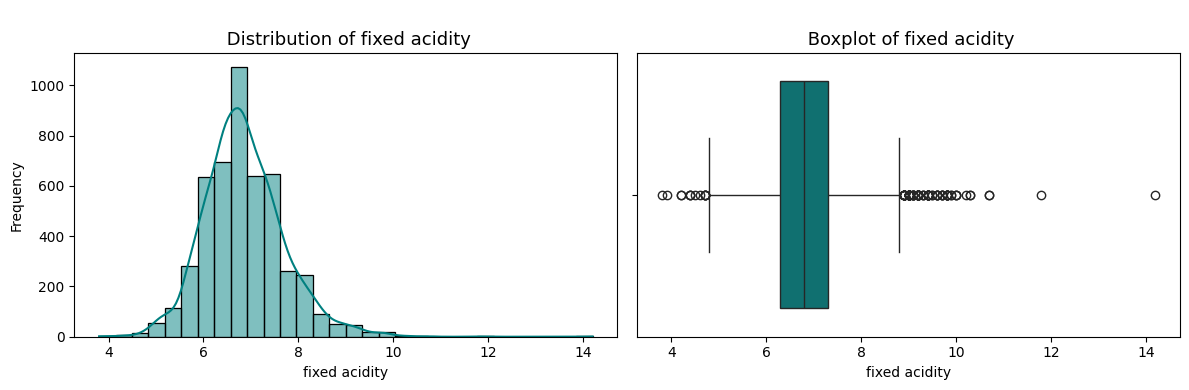

fixed acidity is moderately skewed.
 Feature: volatile acidity
       volatile acidity
count       4898.000000
mean           0.278241
std            0.100795
min            0.080000
25%            0.210000
50%            0.260000
75%            0.320000
max            1.100000

Skewness: 1.577

Kurtosis: 5.092


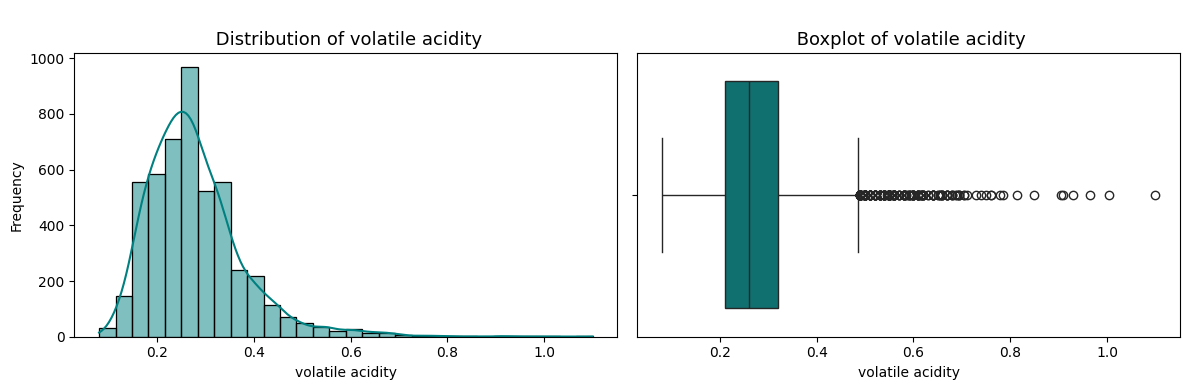


 volatile acidity is highly skewed. Consider log or Box-Cox transformation.
 Feature: citric acid
       citric acid
count  4898.000000
mean      0.334192
std       0.121020
min       0.000000
25%       0.270000
50%       0.320000
75%       0.390000
max       1.660000

Skewness: 1.282

Kurtosis: 6.175


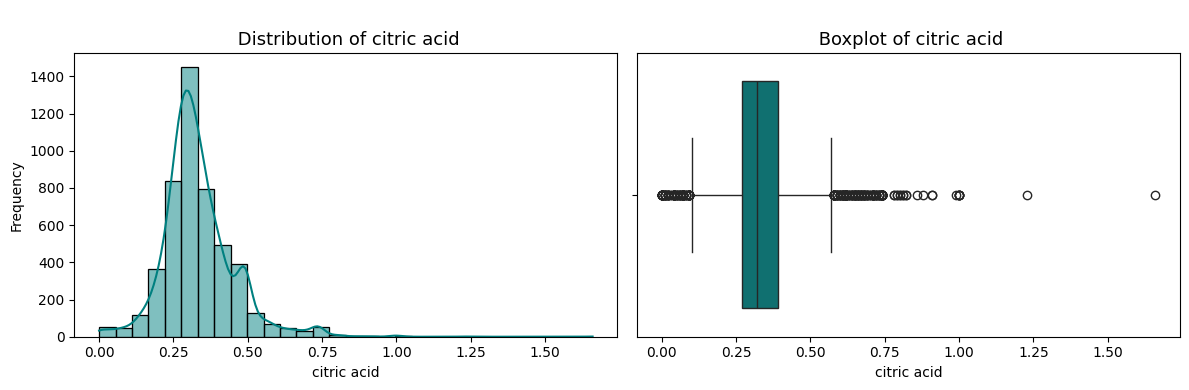


 citric acid is highly skewed. Consider log or Box-Cox transformation.
 Feature: residual sugar
       residual sugar
count     4898.000000
mean         6.391415
std          5.072058
min          0.600000
25%          1.700000
50%          5.200000
75%          9.900000
max         65.800000

Skewness: 1.077

Kurtosis: 3.470


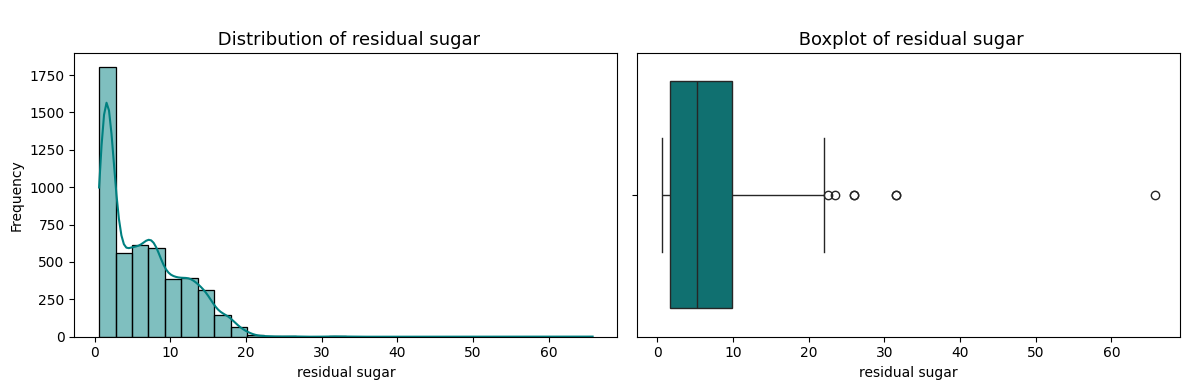


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
 Feature: chlorides
         chlorides
count  4898.000000
mean      0.045772
std       0.021848
min       0.009000
25%       0.036000
50%       0.043000
75%       0.050000
max       0.346000

Skewness: 5.023

Kurtosis: 37.565


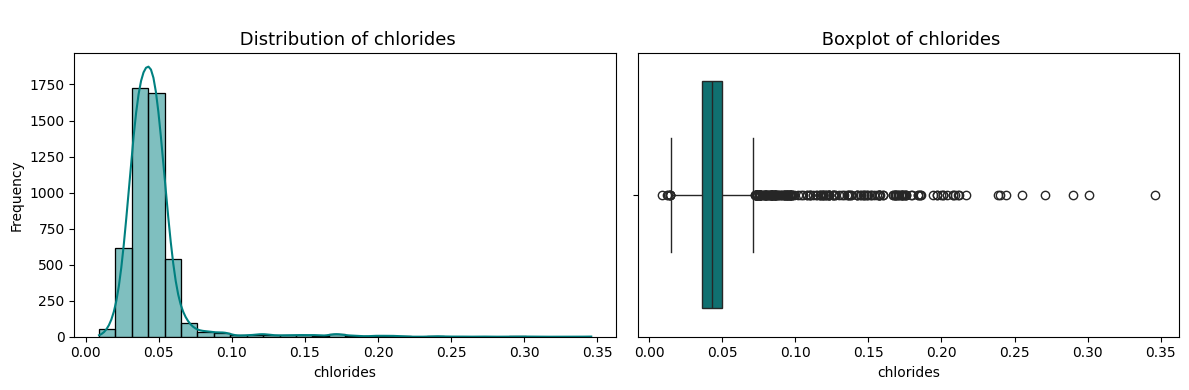


 chlorides is highly skewed. Consider log or Box-Cox transformation.
 Feature: free sulfur dioxide
       free sulfur dioxide
count          4898.000000
mean             35.308085
std              17.007137
min               2.000000
25%              23.000000
50%              34.000000
75%              46.000000
max             289.000000

Skewness: 1.407

Kurtosis: 11.466


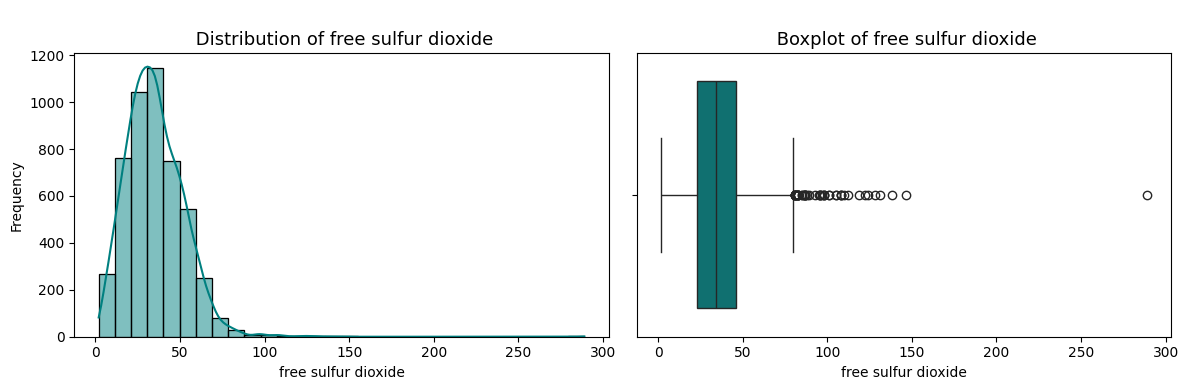


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
 Feature: total sulfur dioxide
       total sulfur dioxide
count           4898.000000
mean             138.360657
std               42.498065
min                9.000000
25%              108.000000
50%              134.000000
75%              167.000000
max              440.000000

Skewness: 0.391

Kurtosis: 0.572


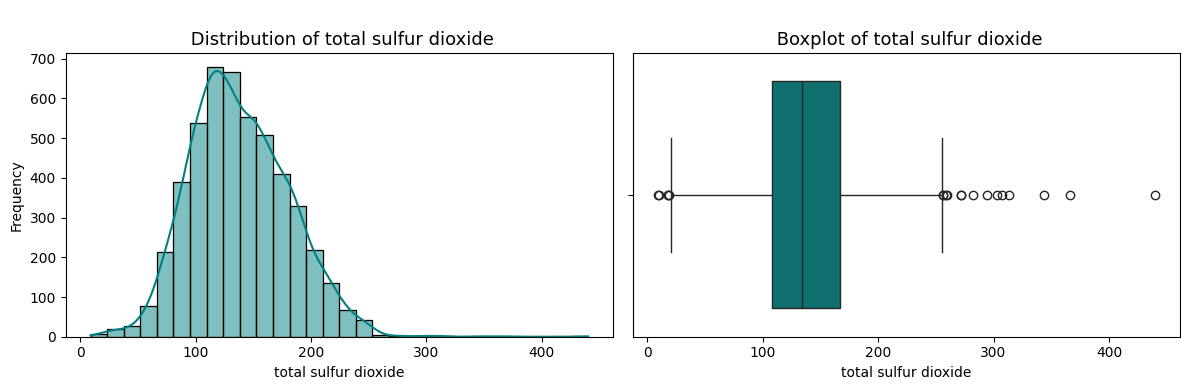

total sulfur dioxide is fairly symmetric.
 Feature: density
           density
count  4898.000000
mean      0.994027
std       0.002991
min       0.987110
25%       0.991723
50%       0.993740
75%       0.996100
max       1.038980

Skewness: 0.978

Kurtosis: 9.794


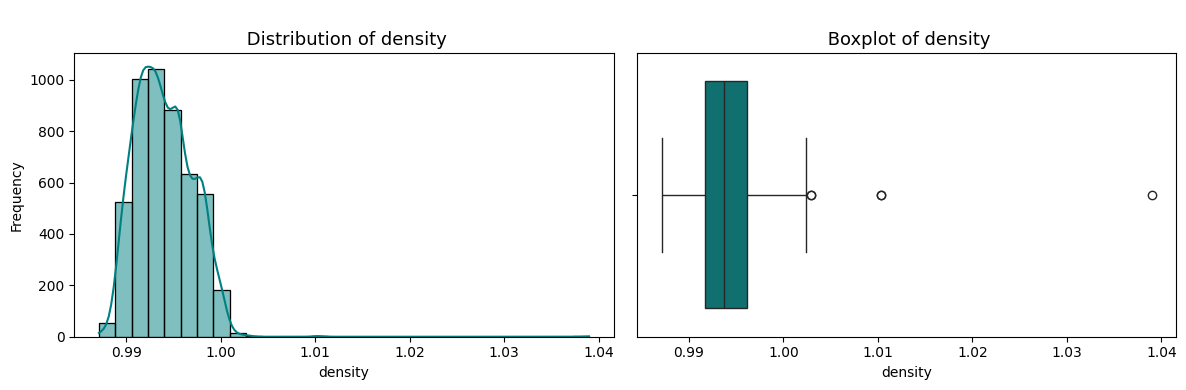

density is moderately skewed.
 Feature: pH
                pH
count  4898.000000
mean      3.188267
std       0.151001
min       2.720000
25%       3.090000
50%       3.180000
75%       3.280000
max       3.820000

Skewness: 0.458

Kurtosis: 0.531


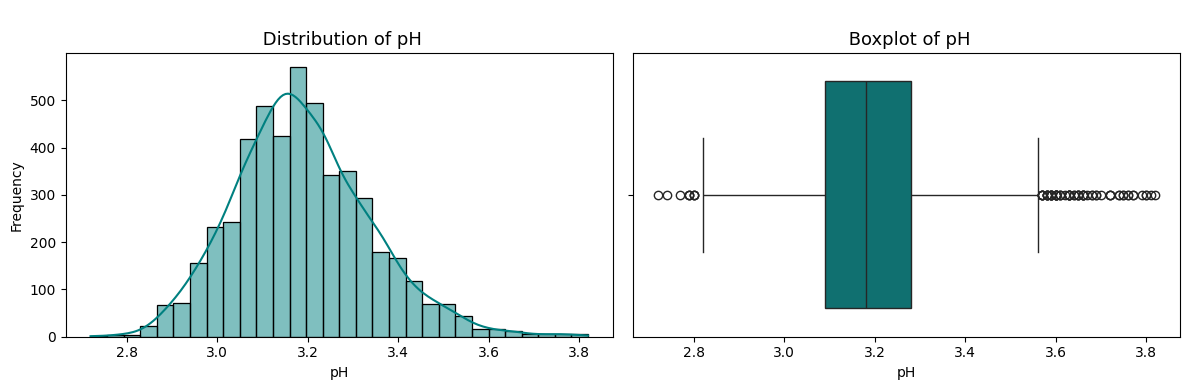

pH is fairly symmetric.
 Feature: sulphates
         sulphates
count  4898.000000
mean      0.489847
std       0.114126
min       0.220000
25%       0.410000
50%       0.470000
75%       0.550000
max       1.080000

Skewness: 0.977

Kurtosis: 1.591


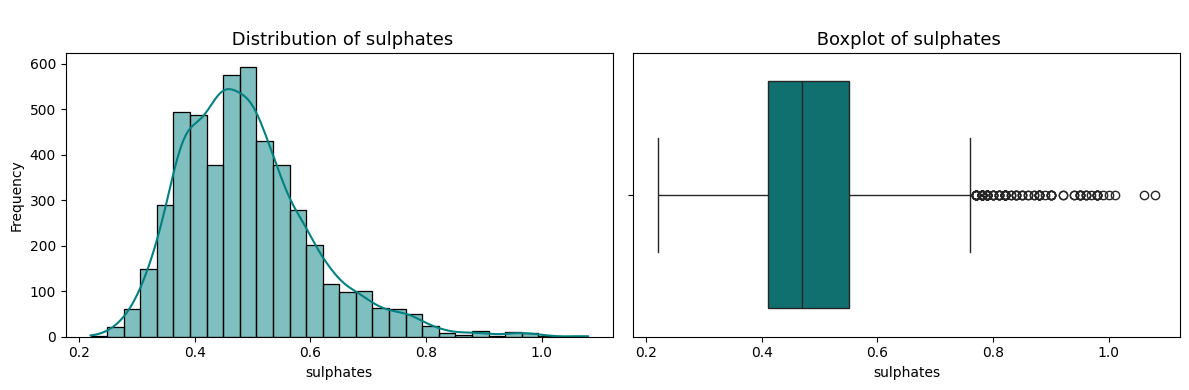

sulphates is moderately skewed.
 Feature: alcohol
           alcohol
count  4898.000000
mean     10.514267
std       1.230621
min       8.000000
25%       9.500000
50%      10.400000
75%      11.400000
max      14.200000

Skewness: 0.487

Kurtosis: -0.698


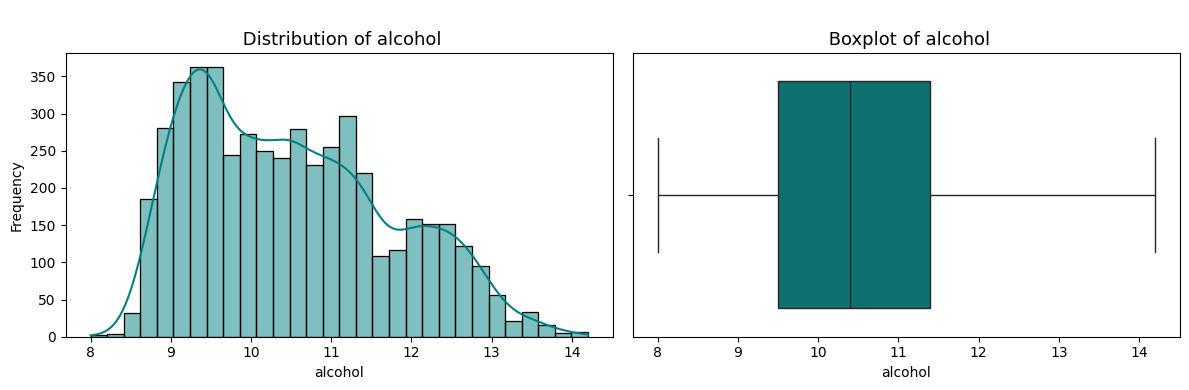

alcohol is fairly symmetric.
 Feature: quality
           quality
count  4898.000000
mean      5.877909
std       0.885639
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000

Skewness: 0.156

Kurtosis: 0.217


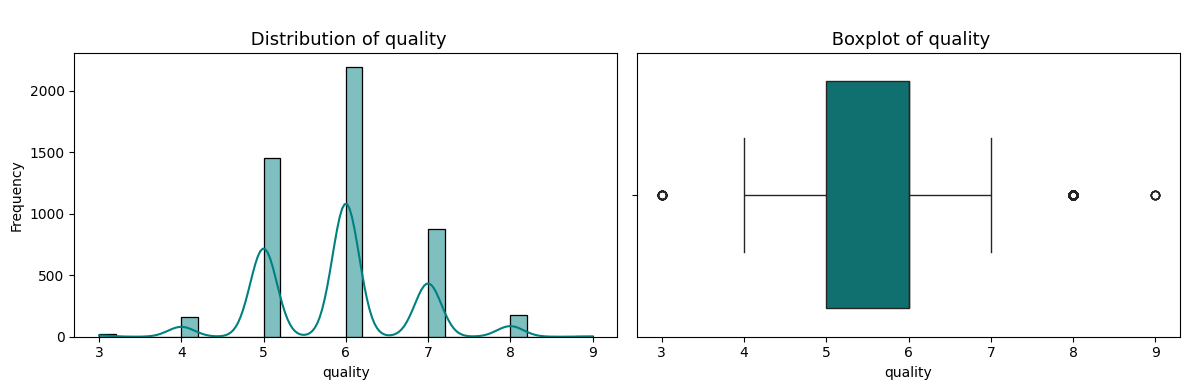

quality is fairly symmetric.


In [12]:
for col in num_features:
  univariate_numerical_eda(df, col)

In [13]:
def univariate_categorical_eda(df, column):
  print(f"Feature: {column}")
  print("="*40)

  # Frequency + proportion
  freq = df[column].value_counts()
  prop = df[column].value_counts(normalize=True) * 100
  summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
  print(summary)
  print()

  # Visualization
  plt.figure(figsize=(8,5))
  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')
  plt.title(f'Distribution of {column}', fontsize=13)
  plt.xlabel(column)
  plt.ylabel('Count')

  # Annotate each bar with percentage
  total = len(df[column])
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 1,
            f'{(height/total)*100:.1f}%', ha='center')
  
  plt.tight_layout()
  plt.show()


In [14]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [15]:
white_wine["quality_label"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

Feature: quality_label
               Count  Percentage
quality_label                   
Medium          3655       74.62
High            1060       21.64
Low              183        3.74



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_2684\2901676213.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index, color='teal')


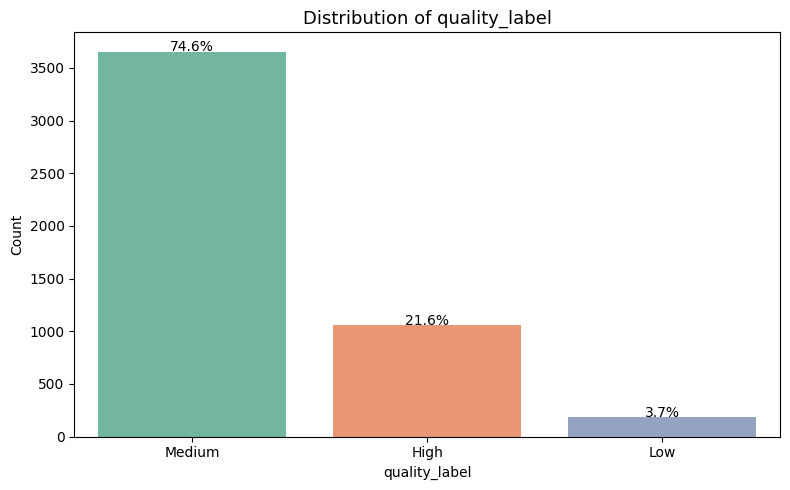

In [16]:
univariate_categorical_eda(white_wine, "quality_label")

### **Bivariate Analysis**

In [17]:
# Lets find the numerical features
num_features = white_wine.select_dtypes(include=['int64', 'float64']).columns

# convert to dataframe
num_features = pd.DataFrame(white_wine[num_features])
num_features.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


Correlation with target

In [19]:
def correlation_with_target(df, target_col, figsize=(10,2)):
  """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
  """
  # Keep only numeric columns
  numeric_df = df.select_dtypes(include='number').copy()
  if target_col not in numeric_df.columns:
    raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")
  
  # compute correlations of every numeric column with the target
  corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

  corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

  plt.figure(figsize=figsize)
  sns.heatmap(
    corrs_df,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'orientation': 'vertical', 'shrink': 0.7}
  )
  plt.xticks(rotation=45, ha='right')
  plt.yticks([0], [target_col], rotation=0)
  plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
  plt.tight_layout()
  plt.show()

  # return sorted correlations for downstream use
  return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

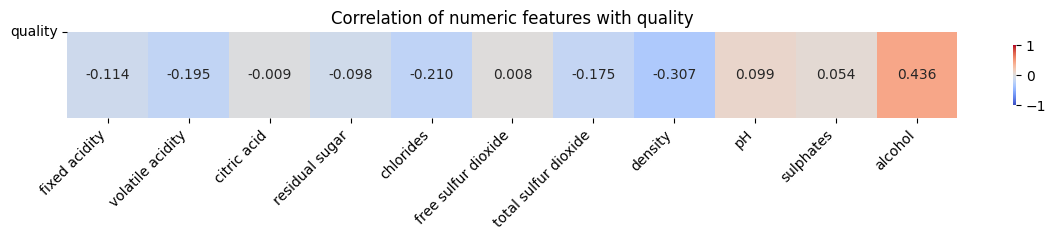

alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
pH                      0.099427
residual sugar         -0.097577
sulphates               0.053678
citric acid            -0.009209
free sulfur dioxide     0.008158
dtype: float64


In [20]:
corr_series = correlation_with_target(df, 'quality', figsize=(12,2.5))

print(corr_series)

In [ ]:
from scipy.stats import pearsonr

def numeric_bivariate_plot(df, x_col, y_col):
  """
    Plots the relationship between two numeric variables with a regression line and displays the correlation coefficient.
  """

  # Calculate correlation coefficient
  